# G01
# Cristina Molina
# Jaime del Rey

# PARTE 1: Agrupamiento.

## Índice


In [2]:
#librerias incluidas las de los clusters
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#para el 3D
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
carga = pd.read_csv(r"C:\Users\Cristina\Desktop\IA II\Datos\USArrests.csv")
#Jaime1 r"C:\Users\Jimbo\Desktop\USArrests.csv"
#Jaime2 r"C:\Users\jdrec\Desktop\USArrests.csv"
#Cris r"C:\Users\Cristina\Desktop\IA II\Datos\USArrests.csv"
#df[0,0] = "States"
carga.head()


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df = carga.rename(columns = {'Unnamed: 0' : 'States'})
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## Descripción

In [5]:
df['UrbanPop'].describe()

count    50.000000
mean     65.540000
std      14.474763
min      32.000000
25%      54.500000
50%      66.000000
75%      77.750000
max      91.000000
Name: UrbanPop, dtype: float64

In [6]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


El conjunto df (Dataframe) contiene información de las cifras de arrestos por asalto, asesinato y violación por 100.000 residentes en USA en el año 1973.

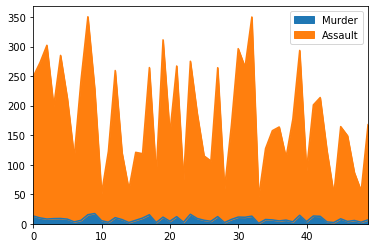

In [20]:
df.loc[:,['Murder','Assault']].plot.area()

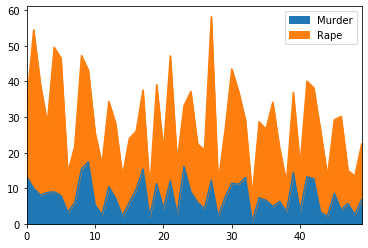

In [28]:
df.loc[:,['Murder','Rape']].plot.area()

En la tabla de estadísticos vemos que no hay valores nulos registrados.<br>
En ambos gráficos de área se observa el bajo nivel de asesinatos en comparación con las otras dos variables a tratar, sobre todo la variable **Asalto** cuya media es 170, en comparación con la de **Asesinato** (7) ó la de **Violación** (21).

In [5]:
tipos = pd.DataFrame(data = df.dtypes).transpose()
tipos

,States,Murder,Assault,UrbanPop,Rape
0,object,float64,int64,int64,float64


Guardamos en un dataset la información relevante que vamos a usar para la agrupación (no usamos el nombre de los países ni la población).

In [35]:
d1 = df.loc[:,['Murder','Assault','Rape']]
d1.head()

,Murder,Assault,Rape
0,13.2,236,21.2
1,10.0,263,44.5
2,8.1,294,31.0
3,8.8,190,19.5
4,9.0,276,40.6


In [11]:
# Crear una instancia del agrupador k-means y agrupar los puntos en clusters
km = KMeans(init='random', n_clusters=3, random_state=333).fit(d1)
######################################
# Agrupar los puntos en clusters
#km.fit(d1)
######################################
# Podemos consultar el cluster asignado a cada punto y el centro de cada cluster
label = km.labels_
centers = km.cluster_centers_

#plot_clusters(X, labels, centers)

In [12]:
centers

array([[  4.27      ,  87.55      ,  14.39      ],
       [  8.21428571, 173.28571429,  22.84285714],
       [ 11.8125    , 272.5625    ,  28.375     ]])

In [13]:
label

array([2, 2, 2, 1, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       0, 2, 1, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1])

Probamos el metodo k-means con 3 centros para y preparamos la visualización. Como tenemos 3 variables, necesitamos una proyección 3D para que se vea mejor.
Vamos a separar las variables para pasarselas a la funcion que hará el grafico.

In [14]:
labl = label #a que clase pertenece cada elemento
xdata = d1['Murder'] #ejex
ydata = d1['Assault'] #ejey
zdata = d1['Rape'] #ejez

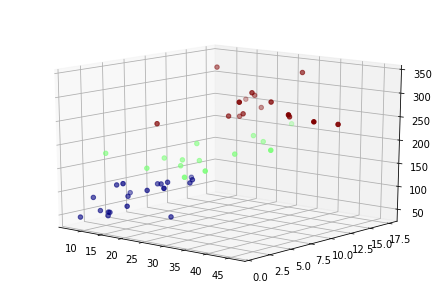

In [15]:
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(15, -50)
ax.scatter(zdata, xdata, ydata, c=labl, cmap='jet');

Aquí ha hecho ya la agrupacion con 3 centros. Los centros los hemos guardado en centers; y labels indica, para cada fila/punto, a que grupo pertenece.
A continuación probamos si hay mejores agrupaciones para este set de datos.

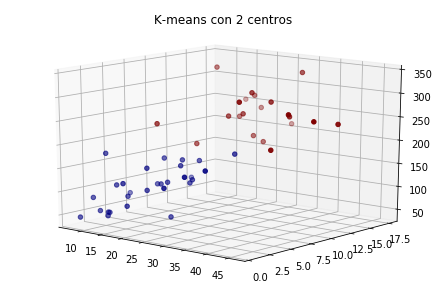

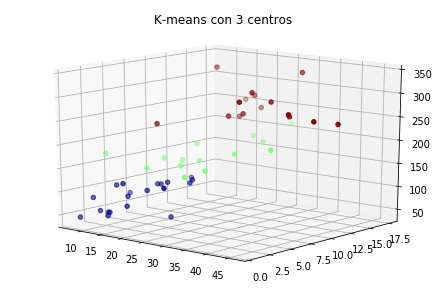

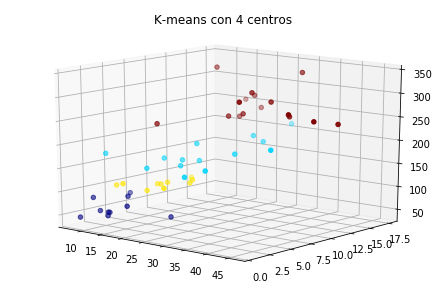

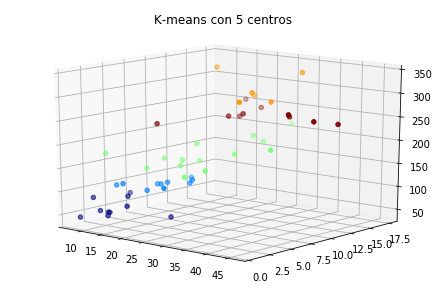

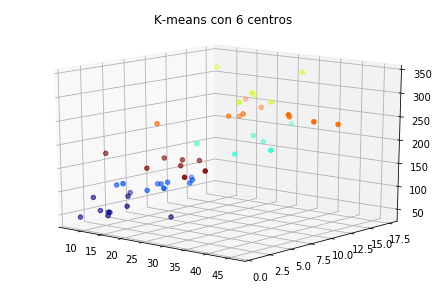

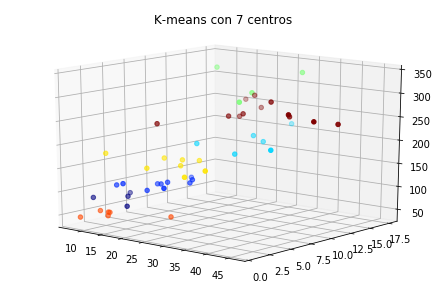

In [148]:
K_MAX = 8
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=333).fit(d1)
    labl = km.labels_
    # Mostramos resultado
    fig = plt.figure()
    ax = p3.Axes3D(fig)
    ax.view_init(15, -50)
    ax.scatter(zdata, xdata, ydata, c=labl, cmap='jet');
    plt.title('K-means con %i centros' %k)
    plt.show()
    davies_boulding[k-2] = davies_bouldin_score(d1, km.labels_)



Pintamos los valores de Davies_Bouldin para cada agrupación.

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

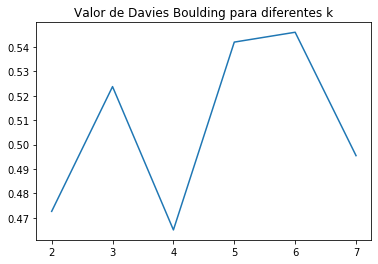

In [149]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

Vemos que la mejor agrupación es con 4 centroides, junto con 2 y 7, aunque esta última parece que son demasiados clusters para tan pocos datos.
Probamos, por ejemplo, con 4. Veremos qué países forman parte de cada cluster y los evaluamos estadisticamente.

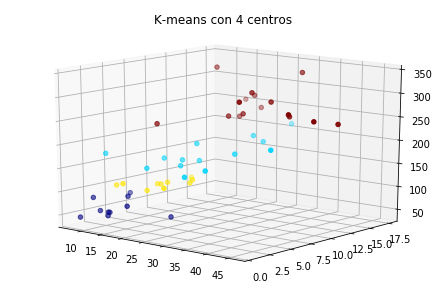

In [56]:
km = KMeans(init='random', n_clusters=4, random_state=333).fit(d1)
labl = km.labels_
# Mostramos resultado
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(15, -50)
ax.scatter(zdata, xdata, ydata, c=labl, cmap='jet');
plt.title('K-means con %i centros' %4)
plt.show()

Antes de analizar la agrupacion más prometedora, observamos en la representación tridimensional que la division en clusters se hace en función de la variable vertical (asaltos) ya que esta toma los valores mas grandes. Cada uno de ellos se puede observar como ocupa un piso o escalon determinado por los asaltos, en la distribución que toman los datos. 

In [57]:
########################################################################################################
df['Clusters'] = labl #metemos las clases en el dataframe original para ver la distro de estados
########################################################################################################

Clusters
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Rape, dtype: object

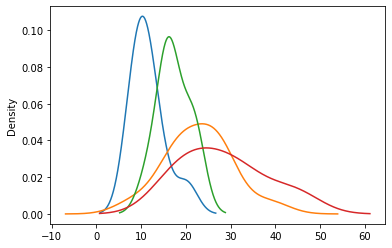

In [58]:
df.groupby(["Clusters"])["Rape"].plot(kind="density")

Clusters
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Assault, dtype: object

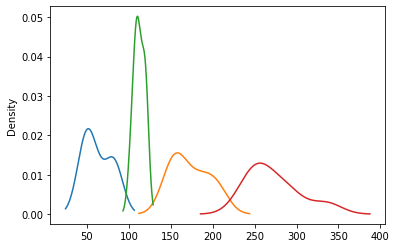

In [59]:
df.groupby(["Clusters"])["Assault"].plot(kind="density")

Clusters
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Murder, dtype: object

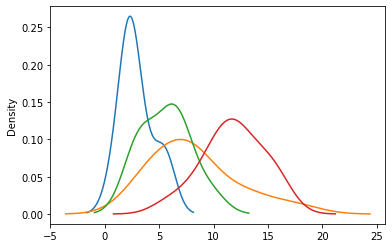

In [60]:
df.groupby(["Clusters"])["Murder"].plot(kind="density")

Podemos observar, ademas, en base a las funciones de densidad que los clusters no mantienen una distribución equitativa con respecto a las distancias entre variables para cada punto evaluado.

Para evitar este tipo de comportamiento normalizamos los datos y volvemos a aplicar el algoritmo.<br>
El tipo de escalado que utilizamos es la normalización estandard porque equipara el peso que toma cada variable a la hora de medir las distancias para hacer los clusters, ya que los asaltos toman demasiado peso.

In [61]:
from sklearn.preprocessing import StandardScaler
#dfCop = df.copy()
# Normalizamos los datos para que estén centrados en 0 y con varianza 1
scaler = StandardScaler()
norm = scaler.fit_transform(d1)

In [62]:
dfNorm = pd.DataFrame(norm, columns = ['Murder','Assault','Rape'])
dfNorm.head()

,Murder,Assault,Rape
0,1.255179,0.790787,-0.003451
1,0.513019,1.118060,2.509424
2,0.072361,1.493817,1.053466
3,0.234708,0.233212,-0.186794
4,0.281093,1.275635,2.088814


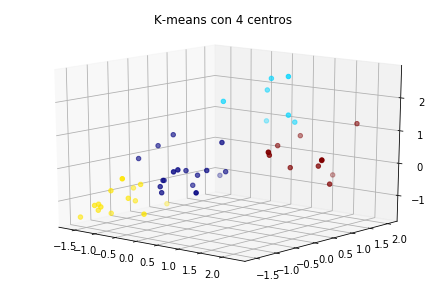

In [63]:
km = KMeans(init='random', n_clusters=4, random_state=333).fit(dfNorm)
lablN = km.labels_
xdataN = dfNorm['Murder'] #ejex
ydataN = dfNorm['Assault'] #ejey
zdataN = dfNorm['Rape'] #ejez
# Mostramos resultado
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(15, -50)
ax.scatter(xdataN, ydataN, zdataN, c=lablN, cmap='jet');
plt.title('K-means con %i centros' %4)
plt.show()

In [50]:
centers = km.cluster_centers_
centers
#ejex asesinatos (1)
#ejey asaltos (2)
#ejez secuestros (3)

array([[-0.27825569, -0.30297299, -0.12462236],
       [ 0.5362111 ,  1.09728039,  1.83922119],
       [-1.09223524, -1.08886481, -1.01722909],
       [ 1.3556802 ,  1.05947378,  0.29043659]])

In [64]:
########################################################################################################
df['Clusters'] = lablN #metemos las clases en el dataframe original para ver la distro de estados
########################################################################################################

Clusters
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Rape, dtype: object

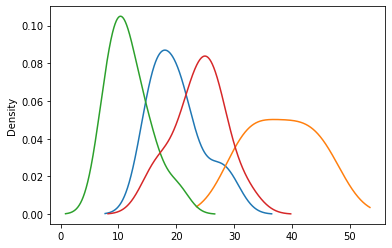

In [66]:
df.groupby(["Clusters"])["Rape"].plot(kind="density")

Clusters
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Assault, dtype: object

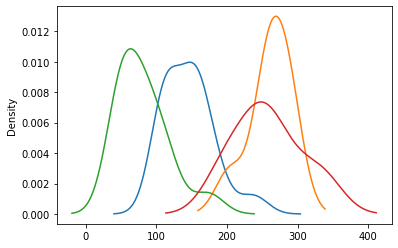

In [67]:
df.groupby(["Clusters"])["Assault"].plot(kind="density")

Clusters
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Murder, dtype: object

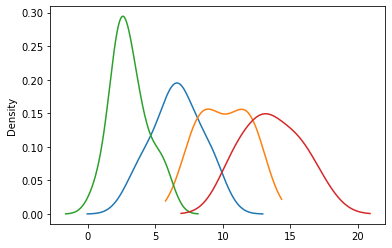

In [68]:
df.groupby(["Clusters"])["Murder"].plot(kind="density")

Ahora los clusters estan mejor distribuidos y vemos muy bien en las gráficas de densidad; cómo, por ejemplo, hay una distribución estandard de los datos originales entre los clusters muy similar. Esto se puede contrastar con el dataframe que los describe. 

In [65]:
df.groupby(["Clusters"]).describe().transpose()

Clusters                 0           1           2           3
Murder   count   17.000000    7.000000   14.000000   12.000000
         mean     6.588235   10.100000    3.078571   13.633333
         std      1.814829    1.833030    1.336573    2.154629
         min      3.200000    7.900000    0.800000   10.400000
         25%      5.900000    8.550000    2.200000   12.350000
         50%      6.600000   10.000000    2.650000   13.200000
         75%      7.400000   11.750000    3.700000   15.400000
         max      9.700000   12.200000    5.700000   17.400000
Assault  count   17.000000    7.000000   14.000000   12.000000
         mean   145.764706  261.285714   80.928571  258.166667
         std     35.232317   29.606949   36.328553   48.048902
         min    106.000000  204.000000   45.000000  188.000000
         25%    115.000000  253.500000   53.750000  229.750000
         50%    149.000000  263.000000   76.500000  251.500000
         75%    159.000000  280.500000   98.000000  284.250000
         max    238.000000  294.000000  174.000000  337.000000
UrbanPop count   17.000000    7.000000   14.000000   12.000000
         mean    68.235294   74.571429   58.500000   64.666667
         std     10.871577   13.414633   16.265821   14.950423
         min     50.000000   48.000000   32.000000   44.000000
         25%     63.000000   72.000000   46.500000   55.500000
         50%     68.000000   78.000000   56.500000   63.000000
         75%     73.000000   80.500000   66.000000   80.000000
         max     89.000000   91.000000   87.000000   86.000000
Rape     count   17.000000    7.000000   14.000000   12.000000
         mean    20.076471   38.285714   11.800000   23.925000
         std      4.422744    5.847344    3.628520    4.456277
         min     14.900000   31.000000    7.300000   16.100000
         25%     16.300000   33.600000    9.350000   21.950000
         50%     19.500000   38.700000   11.150000   24.750000
         75%     21.400000   42.550000   13.850000   26.300000
         max     29.300000   46.000000   20.200000   31.900000

In [71]:
df.loc[df['Clusters'] == 0,'States']

3          Arkansas
7          Delaware
13          Indiana
15           Kansas
16         Kentucky
20    Massachusetts
24         Missouri
25          Montana
29       New Jersey
34             Ohio
35         Oklahoma
36           Oregon
37     Pennsylvania
43             Utah
45         Virginia
46       Washington
49          Wyoming
Name: States, dtype: object

In [72]:
df.loc[df['Clusters'] == 1,'States']

1         Alaska
2        Arizona
4     California
5       Colorado
21      Michigan
27        Nevada
30    New Mexico
Name: States, dtype: object

In [73]:
df.loc[df['Clusters'] == 2,'States']

6       Connecticut
10           Hawaii
11            Idaho
14             Iowa
18            Maine
22        Minnesota
26         Nebraska
28    New Hampshire
33     North Dakota
38     Rhode Island
40     South Dakota
44          Vermont
47    West Virginia
48        Wisconsin
Name: States, dtype: object

In [74]:
df.loc[df['Clusters'] == 3,'States']

0            Alabama
8            Florida
9            Georgia
12          Illinois
17         Louisiana
19          Maryland
23       Mississippi
31          New York
32    North Carolina
39    South Carolina
41         Tennessee
42             Texas
Name: States, dtype: object

Podemos ver qué estados pertenecen a cada cluster.

A continuacion mostraremos en la matriz de gráficos de dispersion para observar cómo se comportan los clusters en funcion de las variables.

In [83]:
dic_target = { 0 : 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3:'Cluster 3'}
df['Clusters'] = df['Clusters'].map(dic_target)
dfMat = df.loc[:,['Murder','Assault','Rape','Clusters']]
dfMat.head()

,Murder,Assault,Rape,Clusters
0,13.2,236,21.2,Cluster 3
1,10.0,263,44.5,Cluster 1
2,8.1,294,31.0,Cluster 1
3,8.8,190,19.5,Cluster 0
4,9.0,276,40.6,Cluster 1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026AA79B68C8>,
      dtype=object)

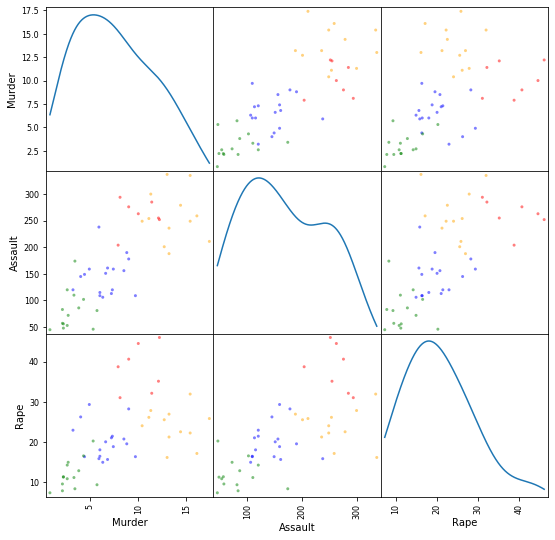

In [93]:
from pandas.plotting import scatter_matrix
dic_colors = { 'Cluster 0': 'blue', 'Cluster 1': 'red', 'Cluster 2': 'green', 'Cluster 3':'orange' }
colors = dfMat['Clusters'].map(dic_colors)
scatter_matrix(dfMat, figsize = (9, 9), diagonal = 'kde',color=colors)

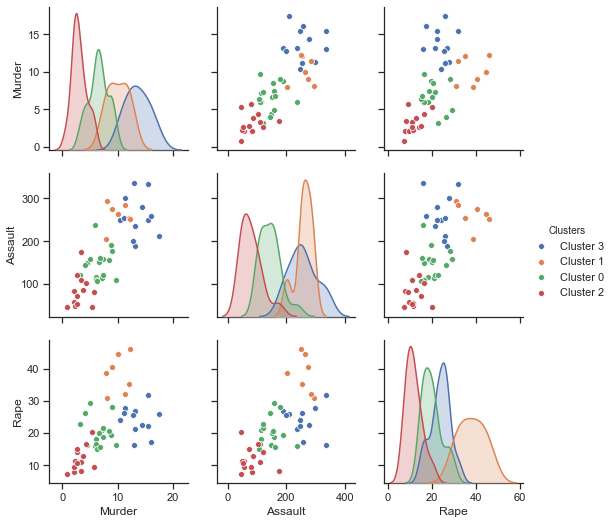

In [94]:
import seaborn as sns
sns.set(style="ticks")

df = dfMat
sns.pairplot(df, hue="Clusters")

La matriz de gráficos de dispersión nos muestra que el cluster 2 es el que mejor se separa, casi independientemente, de las variables en función de las que se tome. 

Por otro lado los clusters 3 y 1 se definen bastante bien menos cunado estan en función de las variables asalto y asesinato.

En definitiva, el cluster 0 es el que mas se mezcla ya que podemos observar que para cada par de variables se confunden elementos del mismo con otros clusters.